## Preprocessing position for decoding

To decode, we need to:
1. Process position from pixel to cm; calculate speed. Table involved: IntervalPositionInfo
2. Linearize position (project 2D position to 1D track graph). Table involved: IntervalLinearizedPosition

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import spyglass as nd
import pandas as pd
import matplotlib.pyplot as plt
from spyglass.utils.nwb_helper_fn import get_nwb_copy_filename
from spyglass.common import IntervalList
from spyglass.common.common_position import IntervalPositionInfo
from spyglass.common.common_position import IntervalPositionInfoSelection
from spyglass.common.common_position import IntervalLinearizationSelection
from spyglass.common.common_position import IntervalLinearizedPosition
from spyglass.common.common_position import TrackGraph

[2023-05-24 14:36:22,573][INFO]: Connecting shijiegu@lmf-db.cin.ucsf.edu:3306
[2023-05-24 14:36:22,686][INFO]: Connected shijiegu@lmf-db.cin.ucsf.edu:3306
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/position_tools/core.py:3: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


### The only cell to be edited:

In [1]:
nwb_file_name = 'eliot20221018.nwb'

### Run the rest

In [4]:
from spyglass.common.common_nwbfile import Nwbfile
from spyglass.utils.nwb_helper_fn import get_all_spatial_series,get_nwb_file

In [5]:
nwb_copy_file_name = get_nwb_copy_filename(nwb_file_name)

IntervalList_pd=pd.DataFrame(IntervalList &
             {'nwb_file_name': nwb_copy_file_name})

# select position timestamps, only those on the track are selected
position_interval=[]
for i in IntervalList_pd.index:
    interval=IntervalList_pd['interval_list_name'][i]
    if interval[-8:-1]=='Session':
        position_interval.append('pos '+str(i)+' valid times')

# add default calculation parameters
for pos_intvl in position_interval:
    IntervalPositionInfoSelection.insert1(
        {'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl,
         'position_info_param_name': 'default' #default parameters are in the database already
        }, skip_duplicates=True)

    IntervalPositionInfoSelection.insert1(
        {'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl,
         'position_info_param_name': 'default_decoding' #upsampled for decoding, default parameters are in the database already
        }, skip_duplicates=True)

IntervalPositionInfo.populate({'nwb_file_name': nwb_copy_file_name})

Computing position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 1 valid times'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Writing new NWB file eliot20221018_F3LWG3PCE7.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 1 valid times'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_KGGVXVN4ZV.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 10 valid times'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_RK7G61W43Q.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 10 valid times'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_YQQHAWGB78.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 3 valid times'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_KHAH23KAUB.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 3 valid times'}
Writing new NWB file eliot20221018_L4TT97XKPS.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 4 valid times'}
Writing new NWB file eliot20221018_V0BJOA0TB5.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 4 valid times'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_AAOYJJCI10.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 6 valid times'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_INYW46HIFI.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 6 valid times'}
Writing new NWB file eliot20221018_VGTK6H1V1J.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 8 valid times'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_GBIQBC0VZ8.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 8 valid times'}
Writing new NWB file eliot20221018_LW9UBRMHLQ.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

In [6]:
position_interval

['pos 1 valid times',
 'pos 3 valid times',
 'pos 4 valid times',
 'pos 6 valid times',
 'pos 8 valid times',
 'pos 10 valid times']

In [7]:
for pos_intvl in position_interval:
    IntervalLinearizationSelection.insert1(
        {'position_info_param_name': 'default',
         'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl, #'pos 1 valid times',
         'track_graph_name': '4 arm lumped 2023',
         'linearization_param_name': 'default'
        }, replace=True)
    
    IntervalLinearizationSelection.insert1(
        {'position_info_param_name': 'default_decoding',
         'nwb_file_name': nwb_copy_file_name,
         'interval_list_name': pos_intvl, #'pos 1 valid times',
         'track_graph_name': '4 arm lumped 2023',
         'linearization_param_name': 'default'
        }, replace=True)

IntervalLinearizedPosition().populate({'nwb_file_name': nwb_copy_file_name})

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 1 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Writing new NWB file eliot20221018_6A42Y6O7KW.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 10 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Writing new NWB file eliot20221018_L0N9R32O7F.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 3 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}
Writing new NWB file eliot20221018_VGEMTO0UTY.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 4 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_LQ6YHHKJ3A.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 6 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}
Writing new NWB file eliot20221018_AEHN5JPTEV.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing linear position for: {'position_info_param_name': 'default', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 8 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_3H8JW3VF0R.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 1 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_WGJEY8F8R0.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 10 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_DJ4NKGBZKQ.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 3 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_H2IJPSY626.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 4 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_E9PB9YPSWH.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 6 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_PN8Z1436QL.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Computing linear position for: {'position_info_param_name': 'default_decoding', 'nwb_file_name': 'eliot20221018_.nwb', 'interval_list_name': 'pos 8 valid times', 'track_graph_name': '4 arm lumped 2023', 'linearization_param_name': 'default'}


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_0' has data shape (212435, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_1' has data shape (47249, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have length <= 3 to represent at most x, y, z.
  warnings.warn("SpatialSeries '%s' has data shape %s which is not compliant with NWB 2.5 and greater. "
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/pynwb/behavior.py:46: UserWarning: SpatialSeries 'series_10' has data shape (42356, 6) which is not compliant with NWB 2.5 and greater. The second dimension should have

Writing new NWB file eliot20221018_KD4Q3JEFE5.nwb


/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

In [8]:
IntervalLinearizedPosition & {'nwb_file_name': nwb_copy_file_name}

position_info_param_name name for this set of parameters,nwb_file_name name of the NWB file,interval_list_name descriptive name of this interval list,track_graph_name,linearization_param_name name for this set of parameters,analysis_file_name name of the file,linearized_position_object_id
default,eliot20221018_.nwb,pos 1 valid times,4 arm lumped 2023,default,eliot20221018_6A42Y6O7KW.nwb,ea9c4194-d598-4157-a008-055d3d707ef1
default,eliot20221018_.nwb,pos 10 valid times,4 arm lumped 2023,default,eliot20221018_L0N9R32O7F.nwb,41c8bfe4-7f4f-473c-8f0d-66892bdc9610
default,eliot20221018_.nwb,pos 3 valid times,4 arm lumped 2023,default,eliot20221018_VGEMTO0UTY.nwb,fd0739db-bc70-46ea-bf6b-cff9833699bb
default,eliot20221018_.nwb,pos 4 valid times,4 arm lumped 2023,default,eliot20221018_LQ6YHHKJ3A.nwb,ca6242bd-43ae-4ab8-b184-bb6164fc83ad
default,eliot20221018_.nwb,pos 6 valid times,4 arm lumped 2023,default,eliot20221018_AEHN5JPTEV.nwb,0f79792a-c3dd-4304-a296-ed2797e1da6d
default,eliot20221018_.nwb,pos 8 valid times,4 arm lumped 2023,default,eliot20221018_3H8JW3VF0R.nwb,b08dfff4-206a-4d2f-965a-e78494a1044e
default_decoding,eliot20221018_.nwb,pos 1 valid times,4 arm lumped 2023,default,eliot20221018_WGJEY8F8R0.nwb,8a1515fe-a397-48e3-82be-56e4e9cb684d
default_decoding,eliot20221018_.nwb,pos 10 valid times,4 arm lumped 2023,default,eliot20221018_DJ4NKGBZKQ.nwb,12be3ca5-3700-47cd-bc01-4147dd0a476f
default_decoding,eliot20221018_.nwb,pos 3 valid times,4 arm lumped 2023,default,eliot20221018_H2IJPSY626.nwb,26a646f1-7b16-4c06-96eb-a51ffdd58073
default_decoding,eliot20221018_.nwb,pos 4 valid times,4 arm lumped 2023,default,eliot20221018_E9PB9YPSWH.nwb,63c2a627-b04f-4c5e-898c-87c37b1b4da2


#### check one interval

/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8/site-packages/h5py/_hl/dataset.py:541: DeprecationWarning: Passing None into shape arguments as an alias for () is deprecated.
  arr = numpy.ndarray(selection.mshape, dtype=new_dtype)
/home/shijiegu/anaconda3/envs/spyglass/lib/python3.8

Text(0.5, 1.0, 'Linear Position')

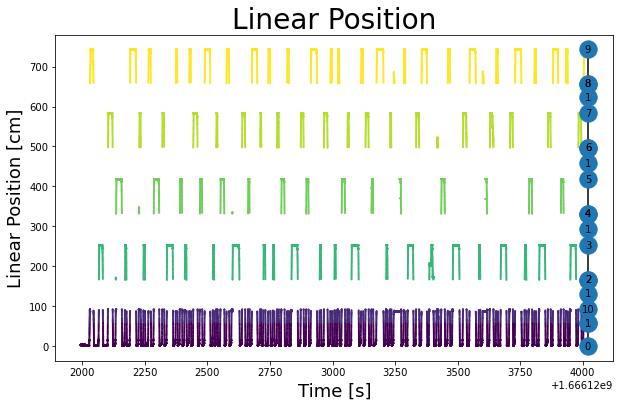

In [9]:
graph = TrackGraph() & {'track_graph_name': '4 arm lumped 2023'}

linear_position_df= (IntervalLinearizedPosition() &
                     {'position_info_param_name': 'default',
                      'nwb_file_name': nwb_copy_file_name,
                      'interval_list_name': 'pos 1 valid times',
                      'track_graph_name': '4 arm lumped 2023',
                      'linearization_param_name': 'default',
                     }).fetch1_dataframe()

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(linear_position_df.index,
            linear_position_df.linear_position,
            c=linear_position_df.track_segment_id,
            s=1)
graph.plot_track_graph_as_1D(
    ax=ax,
    axis='y',
    other_axis_start=linear_position_df.index[-1] + 10)

ax.set_xlabel('Time [s]', fontsize=18)
ax.set_ylabel('Linear Position [cm]', fontsize=18)
ax.set_title('Linear Position', fontsize=28)

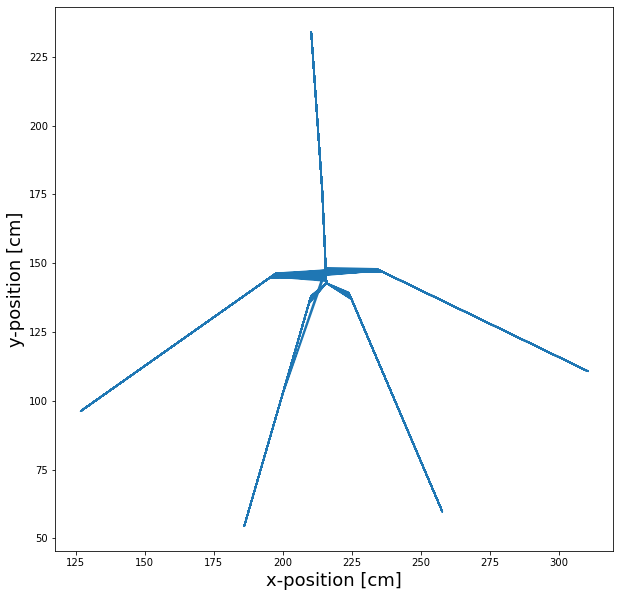

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#ax.plot(position_info.head_position_x, position_info.head_position_y,
#        color='lightgrey', alpha=0.7, zorder=0)
ax.set_xlabel('x-position [cm]', fontsize=18)
ax.set_ylabel('y-position [cm]', fontsize=18)
ax.plot(linear_position_df.projected_x_position, linear_position_df.projected_y_position)